In [1]:
from google.colab import files
uploaded = files.upload()


Saving credit_card_fraud_100.csv to credit_card_fraud_100.csv


In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd
import io


df = pd.read_csv('/content/credit_card_fraud_100.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Amount,Class
0,15795,-1.875677,-1.027711,-0.368450,1.326504,-0.263242,0.881930,0.840527,-0.068981,0.454563,0.088952,1571.912046,0
1,860,-1.366782,0.741241,0.157202,-0.954390,0.534809,-1.684872,-0.038492,-2.578215,0.744038,1.165914,1838.375747,0
2,76820,0.636305,-1.710530,-0.115473,-2.339597,1.905907,-0.747970,-0.443480,-0.561367,-1.591314,-0.542605,1919.309720,1
3,54886,-0.906721,0.118978,0.831709,-0.351537,0.227602,-2.138800,0.082656,0.314204,0.636631,0.877102,1262.112205,0
4,6265,0.476043,1.000486,-0.319355,-1.019341,-0.194670,1.997008,-0.190911,-0.424216,-0.245070,0.463724,1358.251308,0


In [4]:
dataset_path = list(uploaded.keys())[0]

df = pd.read_csv(dataset_path)

In [5]:
df.columns = df.columns.str.strip()


In [6]:
df.fillna(df.mode().iloc[0], inplace=True)

In [7]:
df=df.drop_duplicates()

In [8]:
X= df.drop( 'Class', axis=1)
y = df ['Class']


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform (X)

In [10]:
scaler = StandardScaler ()
_scaled = scaler. fit_transform (X)


In [11]:
sm = SMOTE (random_state=1)
X_res, y_res = sm. fit_resample(X_scaled, y)


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [13]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)


In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)


In [15]:
print("Logistic Regression:")
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test, Y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(Y_test, lr.predict_proba(X_test)[:, 1]))
print("\nRandom Forest:")
print(classification_report(Y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1]))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      0.70      0.58        23
           1       0.67      0.47      0.55        30

    accuracy                           0.57        53
   macro avg       0.58      0.58      0.57        53
weighted avg       0.59      0.57      0.56        53

ROC-AUC Score: 0.6217391304347826

Random Forest:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        23
           1       0.84      0.70      0.76        30

    accuracy                           0.75        53
   macro avg       0.76      0.76      0.75        53
weighted avg       0.77      0.75      0.76        53

ROC-AUC Score: 0.9043478260869566


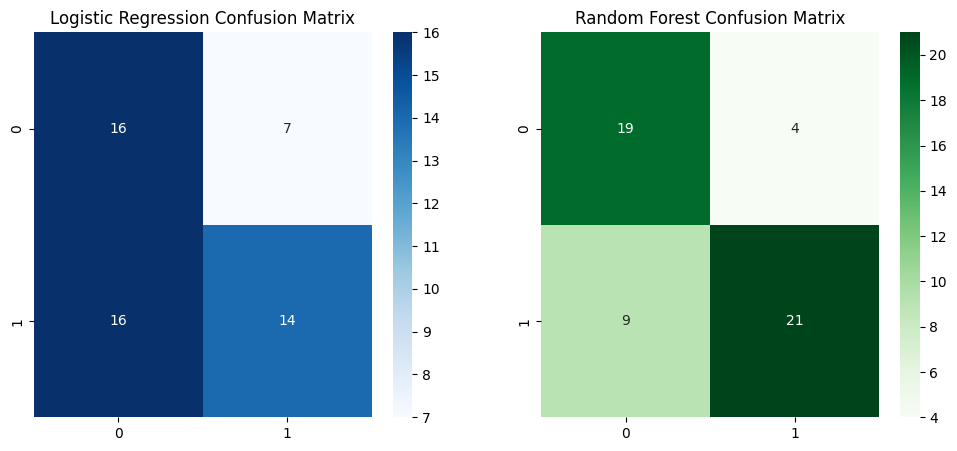

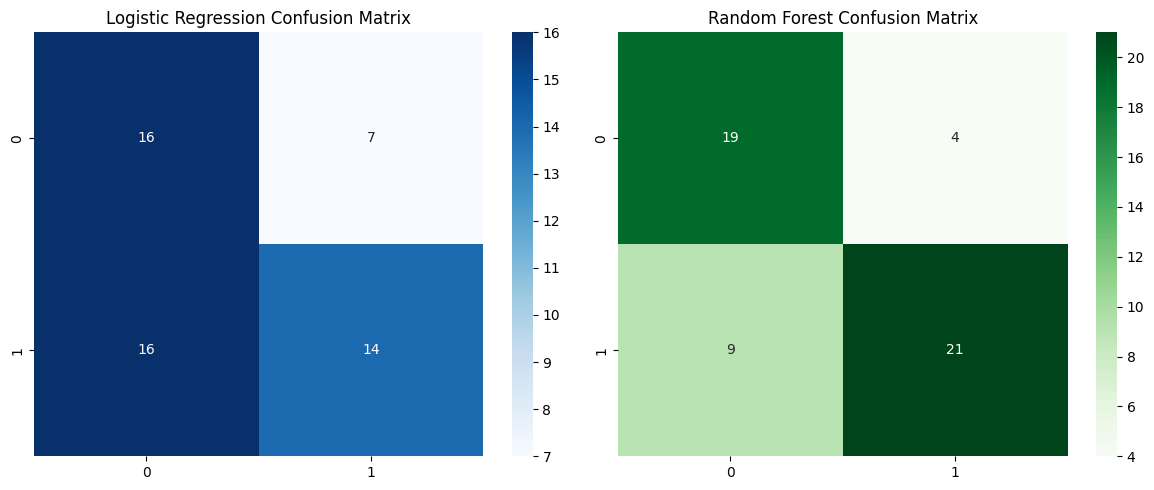

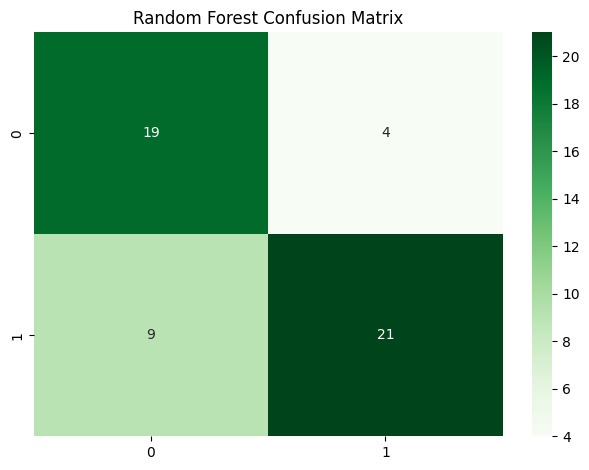

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(Y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(Y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()
sns.heatmap(confusion_matrix(Y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()
plt. show( )